# California house price prediction

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x=housing.data
y=housing.target

data = pd.DataFrame(x, columns = housing.feature_names)
data['SalesPrice'] = y
data.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  SalesPrice  
0    -122.23       4.526  
1    -122.22       3.585  
2    -122.24       3.521  
3    -122.25       3.413  
4    -122.25       3.422

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(data.shape)

(20640, 9)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalesPrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude    SalesPrice  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [8]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalesPrice    0
dtype: int64

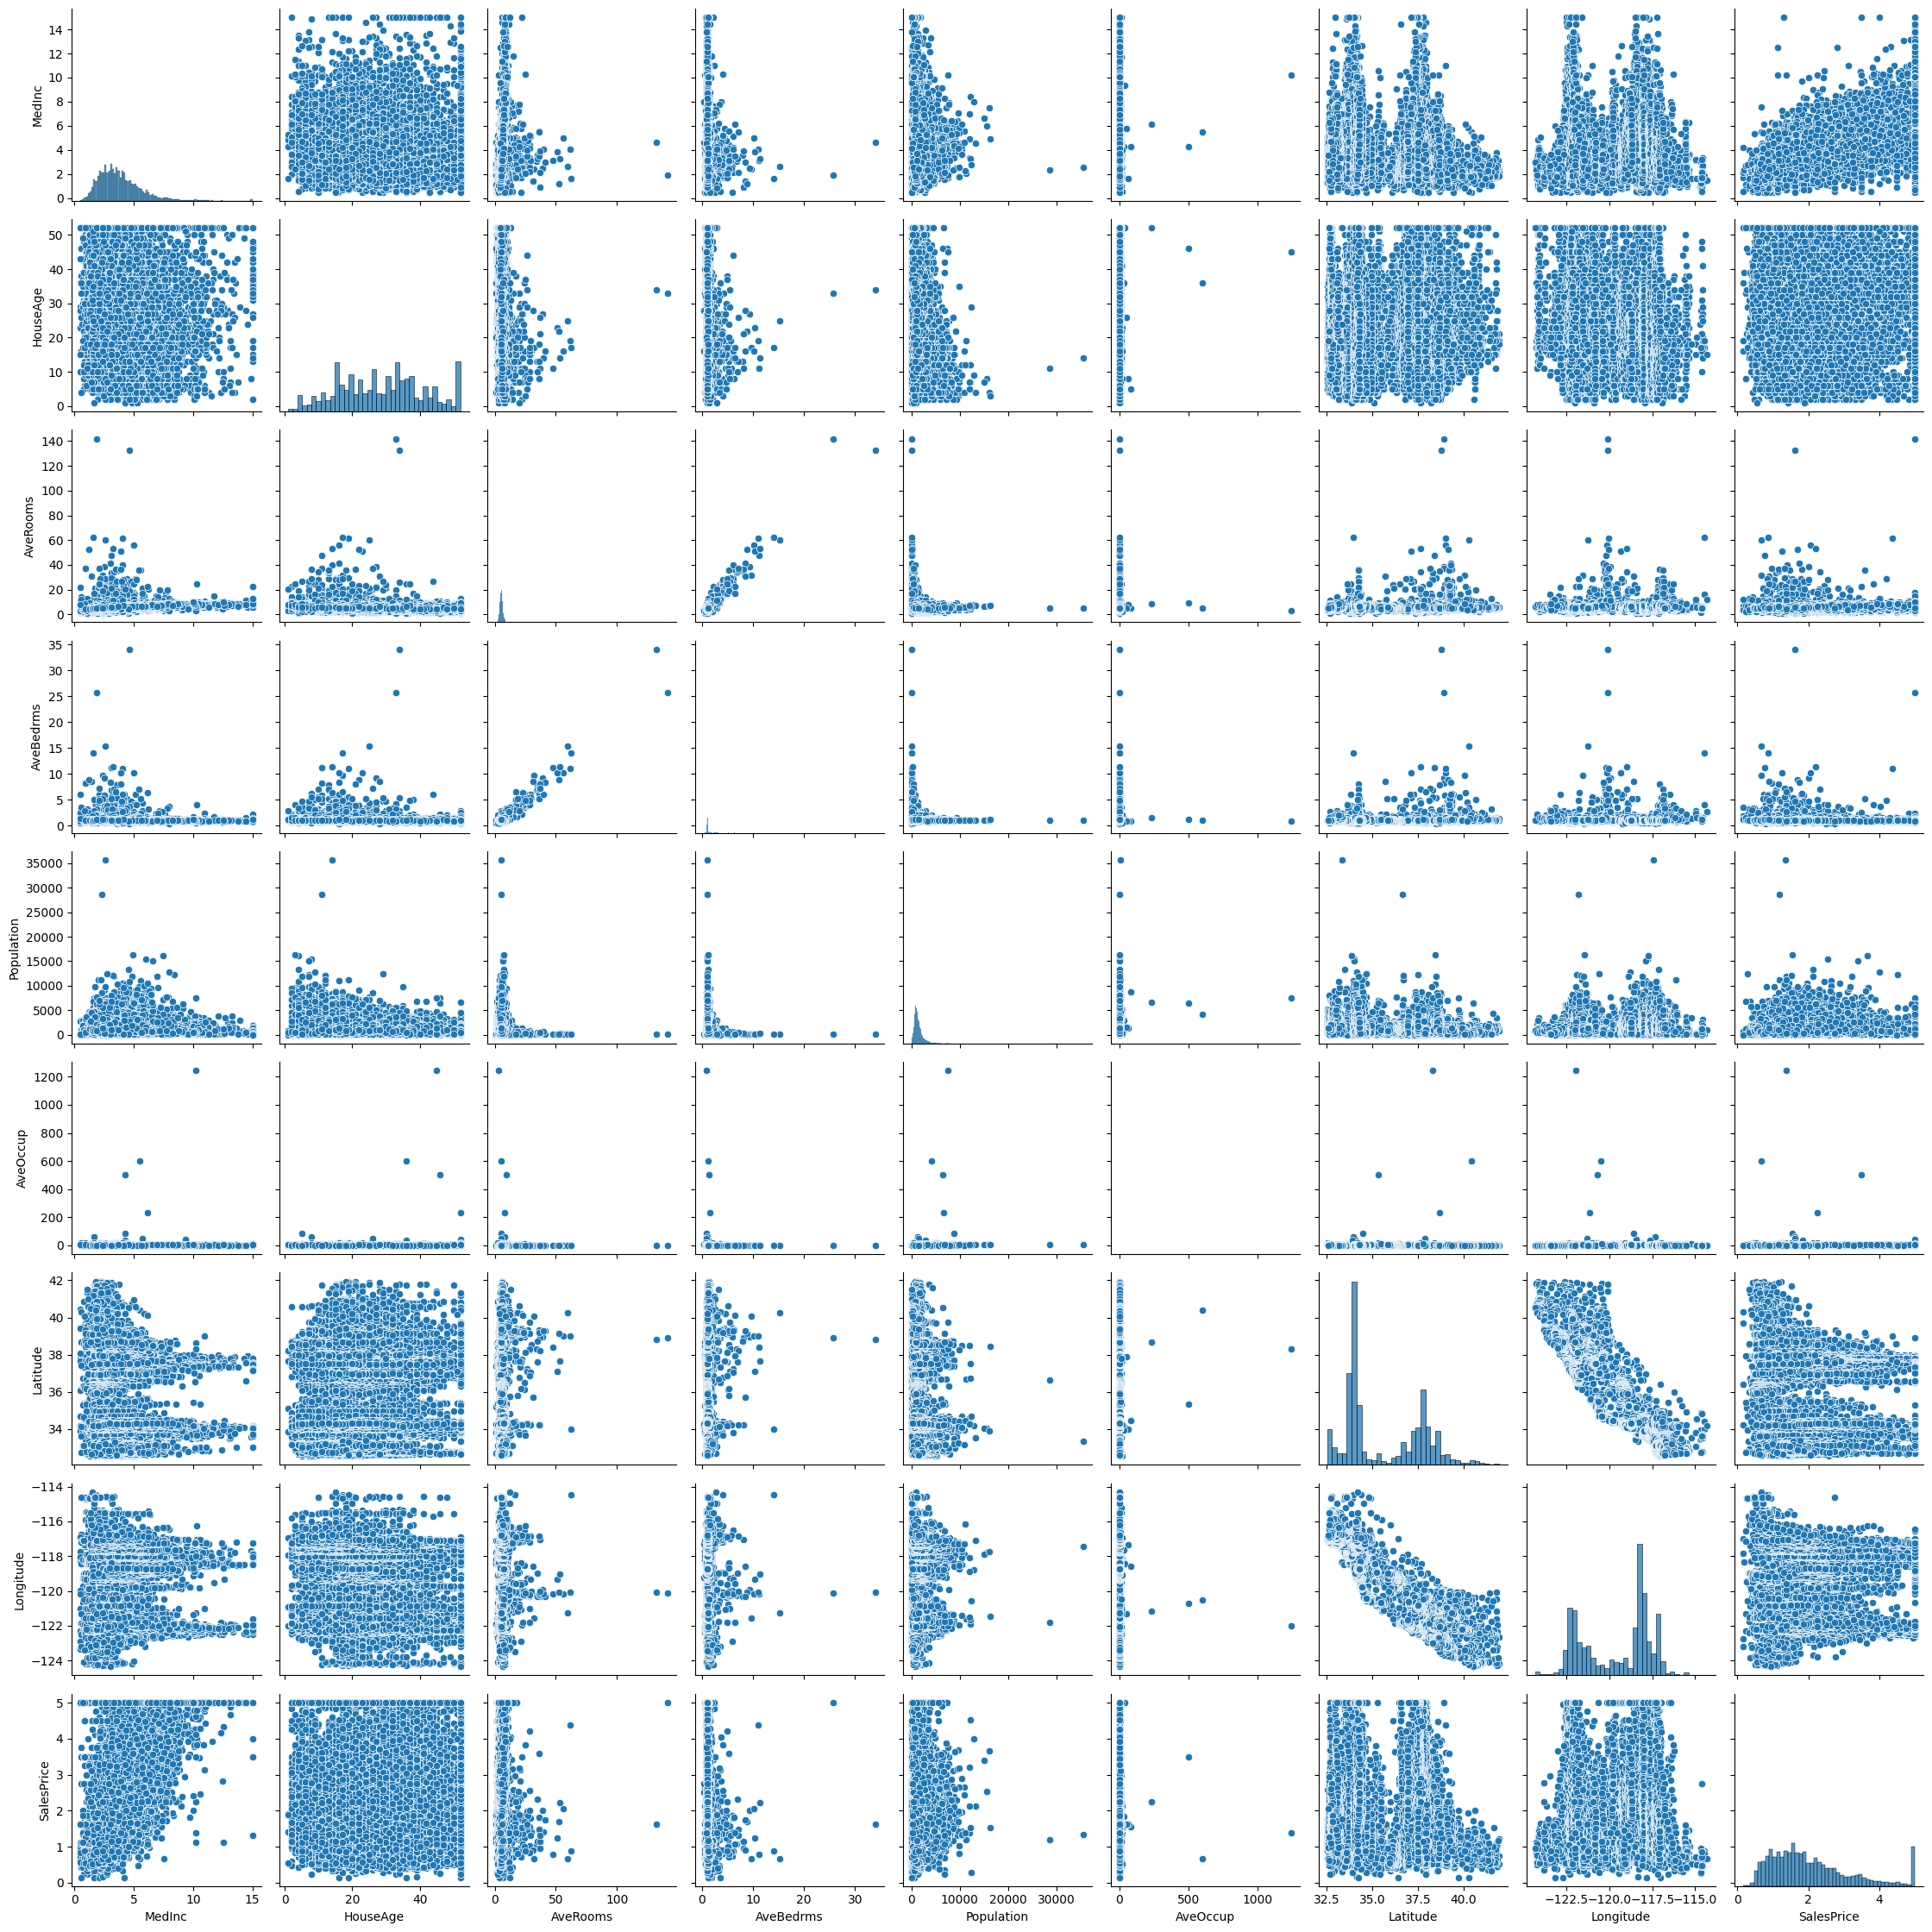

In [9]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

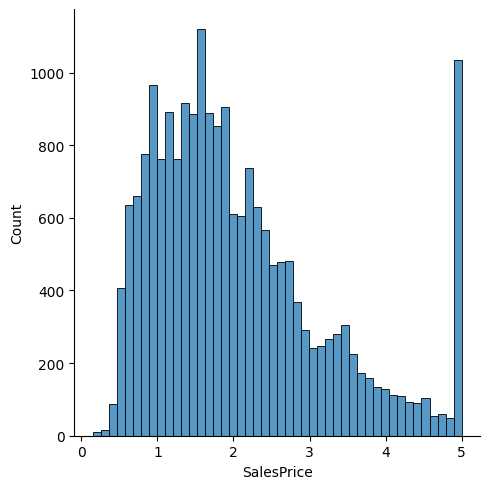

In [10]:
sns.displot(data['SalesPrice'])

In [11]:
print("Skewness: %f" % data['SalesPrice'].skew())
print("Kurtosis: %f" % data['SalesPrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


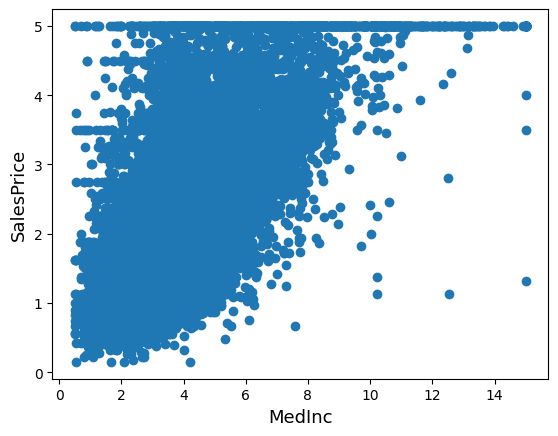

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = data['MedInc'], y = data['SalesPrice'])
plt.ylabel('SalesPrice', fontsize=13)
plt.xlabel('MedInc', fontsize=13)
plt.show()

/tmp/ipython-input-13-1410513499.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalesPrice'], fit=norm);



 mu = 2.07 and sigma = 1.15



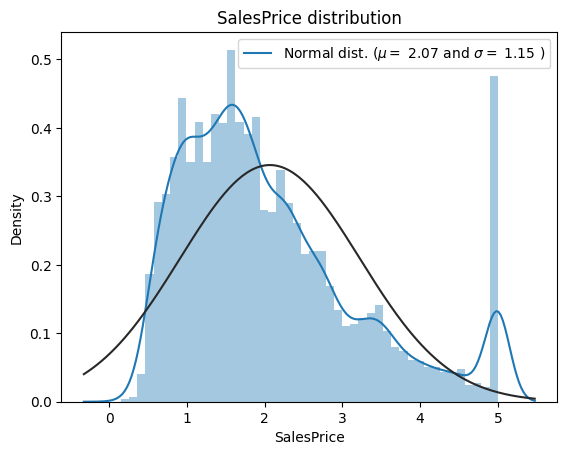

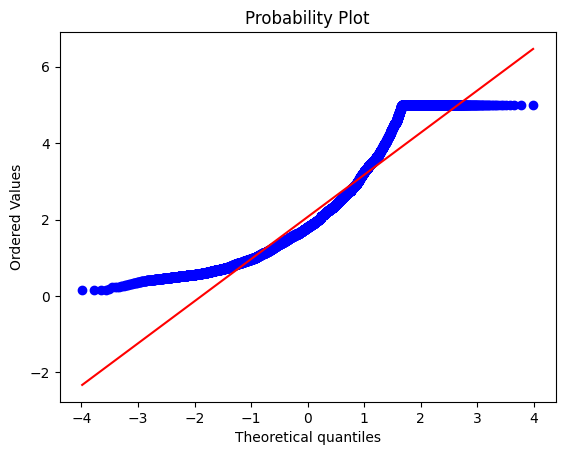

In [13]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data['SalesPrice'], fit=norm);

(mu, sigma) = norm.fit(data['SalesPrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('SalesPrice distribution')
fig = plt.figure()

res = stats.probplot(data['SalesPrice'], plot=plt)
plt.show()

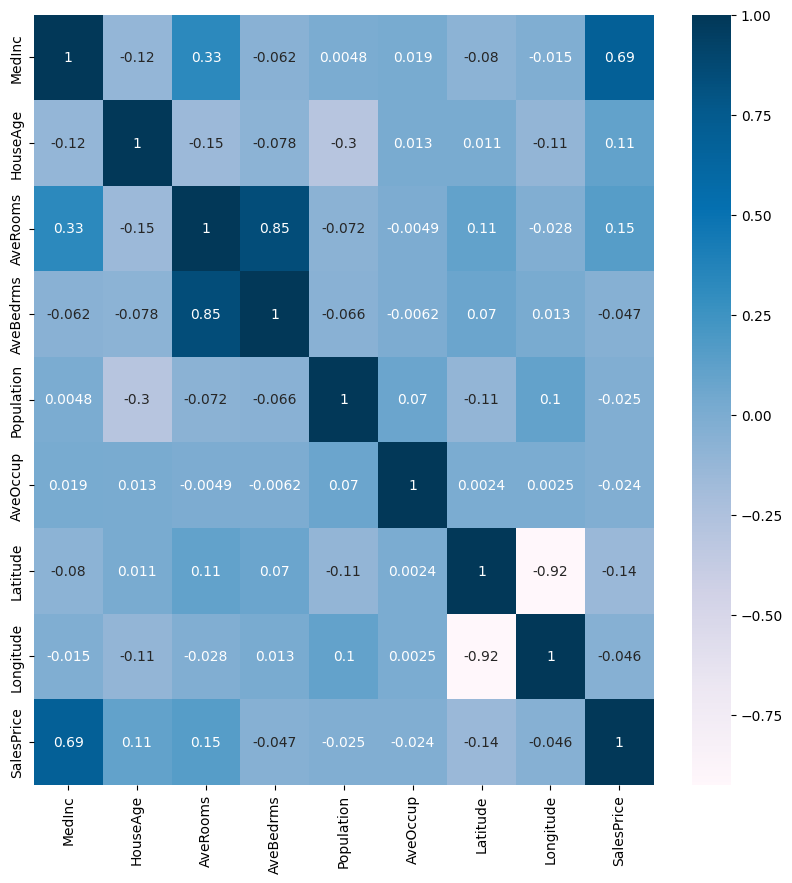

In [14]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [15]:
cor_target = abs(cor["SalesPrice"])

relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.items()]

names.remove('SalesPrice')

print(names)
print(len(names))

['MedInc']
1


In [16]:
from sklearn.model_selection import train_test_split

x=data.drop(['SalesPrice'], axis=1)
y=data['SalesPrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [19]:
prediction = lr.predict(x_test)

print("Actual value of the house:- ", y_test[0])
print("Model Predicted value of the house:- ", prediction[0])

Actual value of the house:-  4.526
Model Predicted value of the house:-  0.7191228416019086


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print(mse)
print(rmse)


0.5558915986952444
0.7455813830127764


In [27]:
import pandas as pd

# Create a DataFrame with the features for a new house
# Make sure the column names and order match the training data (X_train)
new_house_features = pd.DataFrame([[
    3.5,   # MedInc
    30,    # HouseAge
    6.0,   # AveRooms
    1.1,   # AveBedrms
    1500,  # Population
    2.8,   # AveOccup
    34.0,  # Latitude
    -118.0 # Longitude
]], columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])

print(new_house_features)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     3.5        30       6.0        1.1        1500       2.8      34.0   

   Longitude  
0     -118.0  


In [28]:
# Assuming 'lr' is your trained Linear Regression model
# and 'new_house_features' is the DataFrame created for new input features

predicted_price = lr.predict(new_house_features)

print(f"The predicted sales price for the new house is: ${predicted_price[0] * 100000:.2f}")

The predicted sales price for the new house is: $185202.05
